https://huggingface.co/docs/transformers/main/en/model_doc/kosmos-2

In [1]:
import torch
from transformers import Kosmos2Model, Kosmos2Processor
from PIL import Image
import requests

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
version = "microsoft/kosmos-2-patch14-224"
url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.jpg"
text = (
    "<grounding> An image of<phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863>"
    "</object> warming himself by<phrase> a fire</phrase><object><patch_index_0005><patch_index_0911>"
    "</object>"
)

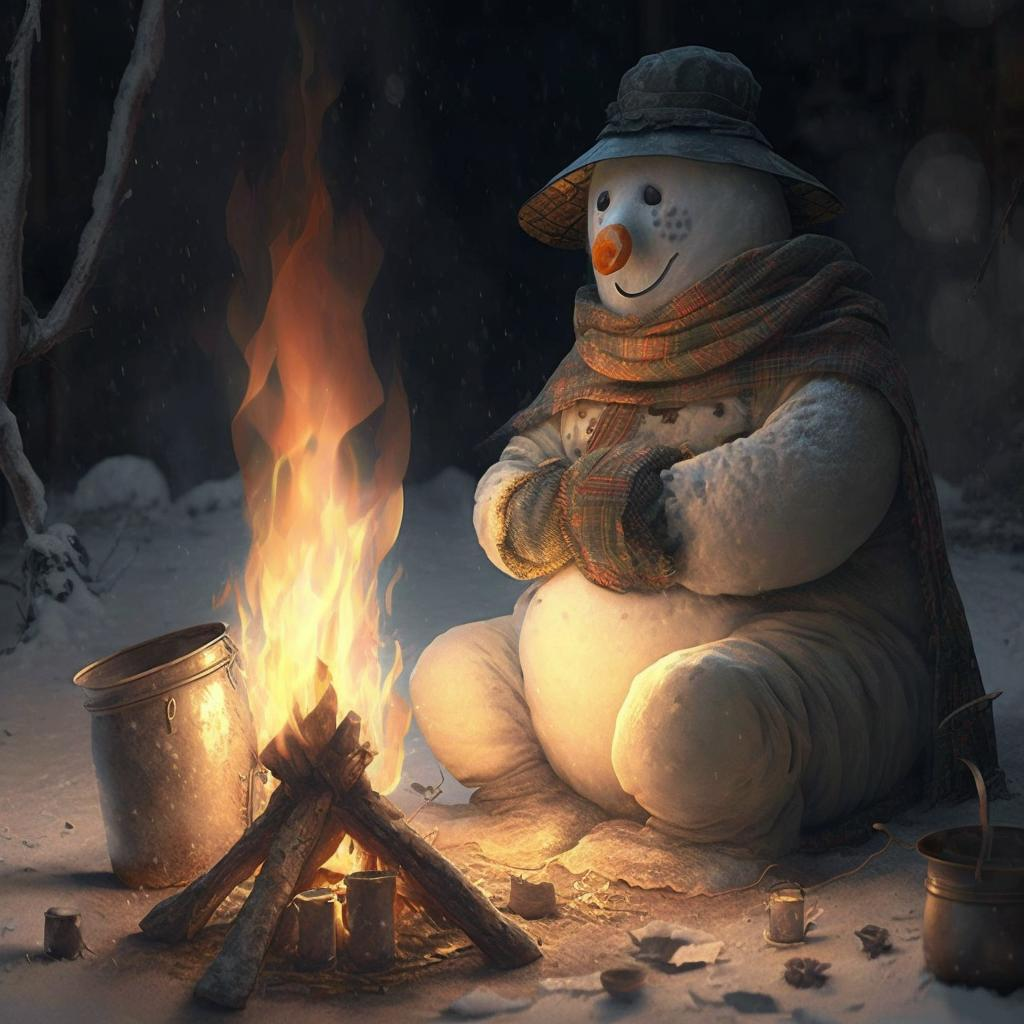

In [4]:
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

# Kosmos2Processor

In [5]:
processor: Kosmos2Processor = Kosmos2Processor.from_pretrained(version)
processor

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Kosmos2Processor:
- image_processor: CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "Kosmos2Processor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  },
  "use_square_size": true
}

- tokenizer: XLMRobertaTokenizerFast(name_or_path='microsoft/kosmos-2-patch14-224', vocab_size=64002, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': [

## processor

In [13]:
inputs = processor(
    text=text,  # 可以为列表或单个string
    images=image,  # 可以为列表或单张图片
    return_tensors="pt",  # 返回数据格式 np pt tf jax
    padding=True,  # 填充方式选择 [True, 'longest', 'max_length', 'do_not_pad']
    add_eos_token=True,
).to(device, torch.float16)
inputs

{'pixel_values': tensor([[[[-1.6171, -1.6171, -1.5879,  ..., -1.4857, -1.5295, -1.5441],
          [-1.6171, -1.6171, -1.6025,  ..., -1.5295, -1.5587, -1.5587],
          [-1.6025, -1.6025, -1.5879,  ..., -1.5587, -1.5733, -1.5733],
          ...,
          [-0.5514, -0.5222, -0.5076,  ..., -0.9602, -0.9893, -0.9893],
          [-0.5514, -0.5514, -0.5368,  ..., -0.9456, -0.9748, -0.9893],
          [-0.5368, -0.5660, -0.5368,  ..., -0.9456, -0.9602, -0.9893]],

         [[-1.5270, -1.5270, -1.4970,  ..., -1.4219, -1.4669, -1.4820],
          [-1.5270, -1.5270, -1.5120,  ..., -1.4669, -1.4970, -1.4970],
          [-1.5120, -1.5120, -1.4970,  ..., -1.4970, -1.5120, -1.5120],
          ...,
          [-0.5365, -0.5065, -0.4914,  ..., -0.7916, -0.8216, -0.8216],
          [-0.5365, -0.5365, -0.5215,  ..., -0.7766, -0.8066, -0.8216],
          [-0.5215, -0.5515, -0.5215,  ..., -0.7766, -0.7916, -0.8216]],

         [[-1.1958, -1.1958, -1.1674,  ..., -1.1105, -1.1532, -1.1674],
          [-1

In [14]:
inputs["input_ids"]

tensor([[    0, 64003,     4,     5,     6,     7,     8,     9,    10,    11,
            12,    13,    14,    15,    16,    17,    18,    19,    20,    21,
            22,    23,    24,    25,    26,    27,    28,    29,    30,    31,
            32,    33,    34,    35,    36,    37,    38,    39,    40,    41,
            42,    43,    44,    45,    46,    47,    48,    49,    50,    51,
            52,    53,    54,    55,    56,    57,    58,    59,    60,    61,
            62,    63,    64,    65,    66,    67, 64004, 64012,   712,  1648,
             9, 64007,    10, 43867, 64008, 64009, 64057, 64876, 64010,  5950,
           597,    32, 64007,    10,   646, 64008, 64009, 64018, 64924, 64010,
             2]], device='cuda:0')

In [15]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

# Kosmos2Model

In [9]:
model: Kosmos2Model = Kosmos2Model.from_pretrained(
    version, torch_dtype=torch.float16
).to(device)

In [16]:
model.eval()
with torch.inference_mode():
    outputs = model(**inputs)
outputs

Kosmos2ModelOutput(last_hidden_state=tensor([[[ 0.0827, -0.1339, -0.3459,  ...,  0.5151, -0.2751,  0.0929],
         [ 0.2852,  0.1737,  0.1624,  ...,  0.7686, -0.7764,  0.1295],
         [-0.3364,  0.0638,  0.4565,  ..., -0.0118, -0.0523, -0.1831],
         ...,
         [ 0.7715, -0.8813,  0.3381,  ..., -0.7783, -0.5898,  0.5127],
         [ 0.1891,  0.0529,  0.3950,  ..., -0.7842, -0.0721,  0.3245],
         [-0.6436, -0.0215, -0.5044,  ...,  0.1750,  0.0246, -0.3059]]],
       device='cuda:0', dtype=torch.float16), past_key_values=((tensor([[[[-9.0283e-01, -1.5173e-01,  1.2783e+00,  ...,  1.0859e+00,
           -9.2383e-01, -1.2012e+00],
          [ 1.5723e+00, -1.1670e-01, -4.4287e-01,  ...,  9.9170e-01,
            2.2227e+00, -7.7637e-01],
          [ 6.3037e-01,  1.8135e+00,  6.1328e-01,  ...,  6.6992e-01,
           -2.9556e-02,  3.2832e+00],
          ...,
          [ 9.5654e-01,  1.0088e+00,  1.2842e+00,  ..., -1.8223e+00,
            1.4365e+00,  9.3945e-01],
          [-9.

In [17]:
[i for i in dir(outputs) if not i.startswith("__")]

['attentions',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'hidden_states',
 'image_embeds',
 'items',
 'keys',
 'last_hidden_state',
 'move_to_end',
 'past_key_values',
 'pop',
 'popitem',
 'projection_attentions',
 'setdefault',
 'to_tuple',
 'update',
 'values',
 'vision_model_output']

In [18]:
outputs.last_hidden_state.shape

torch.Size([1, 91, 2048])